In [1]:
# Import Libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.preprocessing import scale, normalize
!pip install dtreeviz
from dtreeviz.trees import dtreeviz
from sklearn import preprocessing
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import numpy
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
!pip install geopandas

import geopandas
from shapely.geos import lgeos
import fiona
from shapely.geometry import Polygon
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from sklearn.metrics import accuracy_score
from math import radians, cos, sin, asin, sqrt

%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Open Earthchem dataset
df = pd.read_csv('/content/drive/MyDrive/earthchem_download_95122.txt', delimiter = "\t")
df

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MATERIAL,TYPE,COMPOSITION,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,...,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,NI.1,P,PB,PD,RB,RE,S.1,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZN.1,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.144,0.565,14.590,NaN,NaN,NaN,NaN,4.261,NaN,0.081,1.111,3.544,4.402,2.141,0.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11,NaN,18.9,NaN,69.1,NaN,NaN,NaN,11.9,NaN,NaN,190.0,0.50,NaN,8.60,NaN,NaN,NaN,43.0,NaN,42.0,62,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,63.541,0.796,16.427,NaN,NaN,NaN,NaN,5.973,NaN,0.121,1.732,5.136,4.562,1.460,0.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,10,NaN,15.8,NaN,45.6,NaN,NaN,NaN,15.8,NaN,NaN,294.0,0.30,NaN,4.30,NaN,NaN,NaN,76.0,NaN,33.0,101,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.931,0.340,13.794,NaN,NaN,NaN,NaN,4.671,NaN,0.140,0.310,1.771,5.182,2.791,0.070,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,27,NaN,14.0,NaN,62.0,NaN,NaN,0.5,NaN,NaN,NaN,138.0,0.47,NaN,8.30,NaN,NaN,2.24,NaN,NaN,53.7,96,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.047,0.688,14.039,NaN,NaN,NaN,NaN,4.367,NaN,0.110,0.638,2.154,5.195,2.612,0.150,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,NaN,NaN,23.0,NaN,73.0,NaN,NaN,0.7,NaN,NaN,NaN,161.0,0.55,NaN,9.18,NaN,NaN,2.55,14.0,NaN,54.7,119,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.367,0.531,14.150,NaN,NaN,NaN,NaN,5.167,NaN,0.150,0.471,2.213,5.167,2.664,0.120,NaN,< 0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,NaN,NaN,32.0,NaN,66.0,NaN,NaN,0.7,NaN,NaN,NaN,197.0,0.48,NaN,8.82,NaN,NaN,2.37,NaN,NaN,39.8,144,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,64.904,0.834,16.277,NaN,NaN,NaN,NaN,3.854,NaN,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1928,-69.2434,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1929,-69.2433,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
# Drop Silica
df.dropna(subset=['SIO2'])

# Drop columns with less than 50% data 

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,080385-4,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.60,282.0
1,230483-3,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.30,195.0
2,PU-02-34,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5088,-72.2060,0.01,igneous,volcanic,felsic,dacite,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.30,307.0
3,PU-02-25,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5275,-72.1812,0.01,igneous,volcanic,felsic,dacite,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.18,342.0
4,PU-02-20,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5675,-72.1743,0.01,igneous,volcanic,felsic,dacite,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.82,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",-18.1958,-69.2527,0.01,igneous,volcanic,felsic,dacite,64.904,0.834,16.277,3.854,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",-18.1928,-69.2434,0.01,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",-18.1929,-69.2433,0.01,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00,101.0


In [5]:
# Variables we are interested in ( except long/lat)
cluster_variables = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']
# All variables 
all_variables = ['LONGITUDE','LATITUDE','SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']

# All the data
data_all = df.dropna()
# Coordinates
coordinates = data_all.loc[:,['LONGITUDE','LATITUDE']]
# Elemental data
X = data_all[cluster_variables]

data_all


,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,080385-4,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.60,282.0
1,230483-3,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.30,195.0
2,PU-02-34,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5088,-72.2060,0.01,igneous,volcanic,felsic,dacite,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.30,307.0
3,PU-02-25,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5275,-72.1812,0.01,igneous,volcanic,felsic,dacite,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.18,342.0
4,PU-02-20,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5675,-72.1743,0.01,igneous,volcanic,felsic,dacite,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.82,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,RIG187,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",-18.2458,-69.2194,0.01,igneous,volcanic,felsic,rhyolite,75.549,0.205,13.303,1.201,0.051,0.185,0.893,3.880,4.681,0.051,296.0,146.0,157.0,18.40,108.0
3056,AJO 017,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.2167,-69.2125,0.01,igneous,volcanic,felsic,rhyolite,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.00,73.0
3057,AJO017,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",-18.2458,-69.2194,0.01,igneous,volcanic,felsic,rhyolite,75.237,0.258,13.388,1.419,0.072,0.381,1.051,3.545,4.607,0.041,638.0,146.0,147.0,16.30,121.0
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00,101.0


Select Papers with a Significant amount of samples that are near Salta, Argentina

# Salta, Argentina Cluster
Here, we will attempt to select samples near Salta, Argentina and try and predict whether or not they are geochemically different from other samples in South America. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

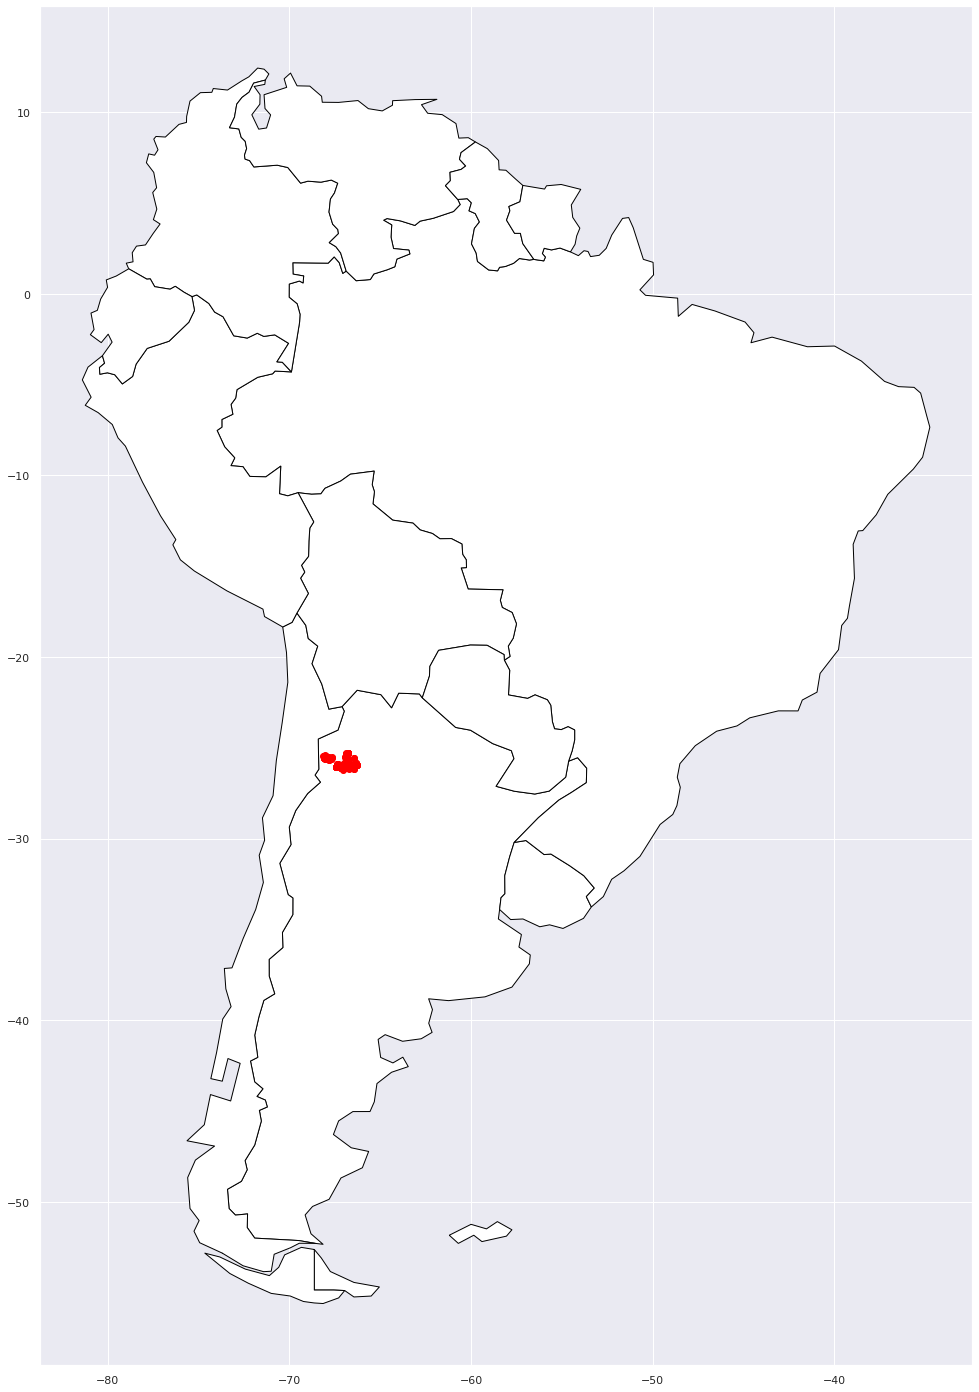

In [6]:

target = {#'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
        # 'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6, 
          #'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          }

data_baby = df

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)
# Make target column int
data_baby['target'] = data_baby['target'].astype(float).astype(int)

# Drop targets that are not in top 10 references
data_baby =data_baby[data_baby['target'] >=1]

# select multiple columns
data_5 = data_baby[all_variables] #.loc[:,['LATITUDE', 'LONGITUDE', 'target']]

#print(data_baby)

gdf = geopandas.GeoDataFrame(data_baby, geometry=geopandas.points_from_xy(data_baby['LONGITUDE'],data_baby['LATITUDE']))
#print(gdf.head)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black',figsize = (40,25))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')


plt.show()



In [7]:
# Target column: 1 within the cluster; 0 not in the cluster
data_5['target'] = 1
data_5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,LONGITUDE,LATITUDE,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,target
184,-67.2095,-25.9751,70.344,0.638,14.502,2.987,0.057,1.310,2.376,3.270,4.315,0.200,327.859,266.508,225.974,32.6308,178.347,1
185,-67.2095,-25.9751,67.111,0.614,15.494,2.849,0.052,1.417,3.297,4.176,4.786,0.204,496.000,244.121,315.000,26.5070,177.728,1
186,-67.2100,-25.9800,68.089,0.531,16.421,2.904,0.040,1.111,3.304,3.805,3.605,0.190,436.000,204.800,338.900,17.9000,148.900,1
187,-67.2100,-25.9800,77.440,0.150,12.539,0.752,0.030,0.110,0.853,2.307,5.818,NaN,NaN,NaN,NaN,NaN,NaN,1
188,-67.2100,-25.9800,78.932,0.110,12.405,0.310,0.030,0.040,0.770,1.701,5.702,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,-66.5820,-26.1272,63.816,0.698,16.324,4.631,0.104,2.271,4.656,2.750,4.417,0.333,593.000,179.000,485.000,14.6000,195.000,1
3029,-66.8100,-25.8500,69.921,0.610,14.804,3.001,0.050,1.190,2.801,3.401,4.001,0.220,282.100,255.700,264.100,30.8000,169.000,1
3030,-66.8100,-25.8500,70.393,0.590,14.599,2.900,0.050,1.160,2.600,3.300,4.200,0.210,253.500,325.200,243.700,31.1000,179.800,1
3031,-66.8245,-25.8536,68.945,0.610,15.288,2.998,0.050,1.219,2.698,3.197,4.796,0.200,592.500,258.000,295.700,34.0000,213.300,1


In [8]:
# Create a Target and ID column

# Add target column to full dataset 
data_all["target"] = data_5["target"]

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index

data_all

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,target,id_number
0,080385-4,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.60,282.0,0.0,0
1,230483-3,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.30,195.0,0.0,1
2,PU-02-34,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5088,-72.2060,0.01,igneous,volcanic,felsic,dacite,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.30,307.0,0.0,2
3,PU-02-25,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5275,-72.1812,0.01,igneous,volcanic,felsic,dacite,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.18,342.0,0.0,3
4,PU-02-20,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5675,-72.1743,0.01,igneous,volcanic,felsic,dacite,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.82,308.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,RIG187,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",-18.2458,-69.2194,0.01,igneous,volcanic,felsic,rhyolite,75.549,0.205,13.303,1.201,0.051,0.185,0.893,3.880,4.681,0.051,296.0,146.0,157.0,18.40,108.0,0.0,3055
3056,AJO 017,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.2167,-69.2125,0.01,igneous,volcanic,felsic,rhyolite,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.00,73.0,0.0,3056
3057,AJO017,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",-18.2458,-69.2194,0.01,igneous,volcanic,felsic,rhyolite,75.237,0.258,13.388,1.419,0.072,0.381,1.051,3.545,4.607,0.041,638.0,146.0,147.0,16.30,121.0,0.0,3057
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00,101.0,0.0,3061


In [9]:
# create new dictionary for id numbers -> show long/lat
locations = pd.DataFrame(data_all,index = data_all['id_number'], columns = ['LATITUDE', 'LONGITUDE'])

# Checking to see that we can call id_number to get correct Lat/Long values
print(locations.head())
print(' ')
print(locations.loc[4])

           LATITUDE  LONGITUDE
id_number                     
0          -41.1000   -72.4930
1          -41.1000   -72.4930
2          -40.5088   -72.2060
3          -40.5275   -72.1812
4          -40.5675   -72.1743
 
LATITUDE    -40.5675
LONGITUDE   -72.1743
Name: 4, dtype: float64


___________________________________

Plot Data: Red all the samples & Blue shows the selected samples we are training/testing 

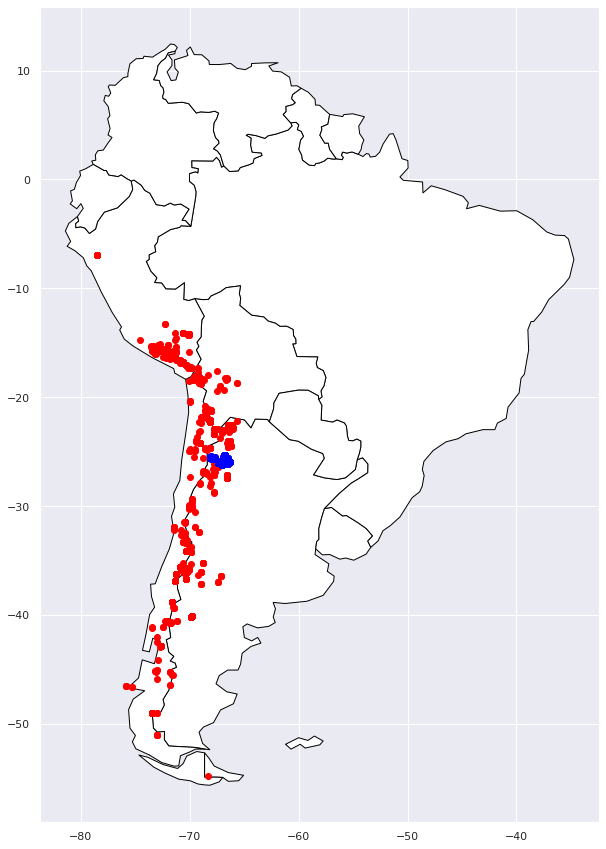

In [10]:
# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')


# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(data_5, geometry=geopandas.points_from_xy(data_5['LONGITUDE'],data_5['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()



___________________________

        SIO2   TIO2   AL2O3   FEOT    MNO  ...     BA     RB      SR     TH     ZR
0     69.144  0.565  14.590  4.261  0.081  ...  550.0   69.1   190.0   8.60  282.0
1     63.541  0.796  16.427  5.973  0.121  ...  396.0   45.6   294.0   4.30  195.0
2     70.931  0.340  13.794  4.671  0.140  ...  747.0   62.0   138.0   8.30  307.0
3     70.047  0.688  14.039  4.367  0.110  ...  776.0   73.0   161.0   9.18  342.0
4     69.367  0.531  14.150  5.167  0.150  ...  692.0   66.0   197.0   8.82  308.0
...      ...    ...     ...    ...    ...  ...    ...    ...     ...    ...    ...
3055  75.549  0.205  13.303  1.201  0.051  ...  296.0  146.0   157.0  18.40  108.0
3056  74.796  0.274  13.367  1.418  0.071  ...  513.0   40.4   512.6   4.00   73.0
3057  75.237  0.258  13.388  1.419  0.072  ...  638.0  146.0   147.0  16.30  121.0
3061  66.728  0.555  17.025  3.542  0.030  ...  766.0   61.0   508.0   5.00  101.0
3062  75.179  0.129  13.810  0.850  0.072  ...  803.0   94.0  1125.0  20.17  150.0

[11

<function matplotlib.pyplot.show>

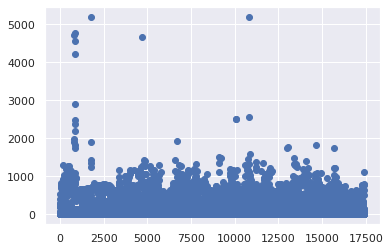

In [11]:
# Select X and y variables

X = data_all[cluster_variables]#.astype(int)
y = data_all['target'].astype(int)

print(X)
plt.scatter(range(17415),X)
plt.show

In [12]:
# How many values are in the Salta cluster vs. the rest of the data? 
data_all['target'].value_counts()

# 1 = Salta cluster = 246 samples
# 0 = other places = 915 samples 


0.0    915
1.0    246
Name: target, dtype: int64

In [13]:
# Selecting samples for train and testing 
# 50/50 - yes in cluster/no in cluster
# If a sample is in the Salta cluster, randomly select 120 samples
# If a sample is elsewhere, randomly select 120 samples 

# when target = 0, save in y_0
data_0 = data_all[data_all['target'].isin([0])]

# when target = 1 or in Salta, save in y_1
data_1 = data_all[data_all['target'].isin([1])]

# Shuffle both variables with target/ without target
data_0 = data_0.sample(frac = 1)
data_1 = data_1.sample(frac = 1)


# Create train and test variables 
# Training variables
train_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
train_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)

# Testing variables
test_y_0 = pd.DataFrame.sample(data_0['target'],60, replace = True)
test_y_1 = pd.DataFrame.sample(data_1['target'],60, replace = True)


# Add both target variables together - 120 samples per variable
y_train = pd.concat((train_y_1, train_y_0))
y_test = pd.concat((test_y_1, test_y_0))

# Shuffling new variables 
y_train = shuffle(y_train)
y_test = shuffle(y_test)

# Get respective cluster variable values for X from y values
X_train = data_all.loc[y_train.index]
X_test = data_all.loc[y_test.index]


print(y_train)
print('  ')
print(train_y_1)

2993    1.0
323     0.0
1561    0.0
2348    0.0
2580    0.0
       ... 
2979    1.0
1561    0.0
2739    1.0
222     1.0
1625    0.0
Name: target, Length: 120, dtype: float64
  
2954    1.0
3029    1.0
231     1.0
3004    1.0
2993    1.0
2982    1.0
2359    1.0
2476    1.0
1519    1.0
2944    1.0
207     1.0
214     1.0
3003    1.0
2456    1.0
2762    1.0
222     1.0
2953    1.0
3019    1.0
1514    1.0
1513    1.0
1521    1.0
2758    1.0
1707    1.0
2450    1.0
221     1.0
2359    1.0
2979    1.0
3016    1.0
2738    1.0
1513    1.0
1501    1.0
2950    1.0
2466    1.0
2986    1.0
204     1.0
2360    1.0
2763    1.0
193     1.0
2461    1.0
2956    1.0
3004    1.0
3009    1.0
2360    1.0
2739    1.0
3025    1.0
1529    1.0
2455    1.0
3025    1.0
203     1.0
220     1.0
1706    1.0
2443    1.0
203     1.0
2966    1.0
227     1.0
2993    1.0
1525    1.0
185     1.0
201     1.0
214     1.0
Name: target, dtype: float64


In [14]:
X_train

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,target,id_number,geometry
2993,CG 122,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,67.054,0.560,15.412,4.003,0.050,1.221,3.403,3.303,4.704,0.290,530.30,212.000,264.400,29.2000,175.90,1.0,2993,POINT (-66.81000 -25.85000)
323,I-D2,GEOROC,"GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO;...",-40.5900,-72.1200,0.01,igneous,volcanic,felsic,dacite,65.000,1.047,14.677,6.522,0.151,1.379,3.845,4.711,2.346,0.322,601.00,63.200,267.400,7.8800,287.00,0.0,323,POINT (-72.12000 -40.59000)
1561,MAC153,GEOROC,"SANDEMAN, H. A.; CLARK, A. H., 2004",-14.2814,-70.0681,0.01,igneous,volcanic,felsic,dacite,67.317,0.456,14.625,3.723,0.124,3.091,2.375,2.386,5.435,0.467,1489.00,290.000,272.000,15.0000,138.00,0.0,1561,POINT (-70.06810 -14.28140)
2348,PIG-03-131,GEOROC,"LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORN...",-15.9775,-71.3569,0.01,igneous,volcanic,felsic,rhyolite,76.672,0.163,13.595,0.440,0.024,0.030,0.490,3.689,4.868,0.030,483.00,213.000,66.000,29.5000,90.00,0.0,2348,POINT (-71.35690 -15.97750)
2580,M38C,GEOROC,"BENEDINI, L.; GREGORI, D. A.; STRAZZERE, L.; F...",-40.2000,-69.8500,0.01,igneous,volcanic,felsic,rhyolite,74.219,0.276,13.401,2.343,0.048,0.444,1.168,2.914,5.115,0.072,992.00,219.000,173.000,13.6000,156.00,0.0,2580,POINT (-69.85000 -40.20000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,CMS-38,GEOROC,"GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.;...",-26.0871,-66.6877,0.01,igneous,volcanic,felsic,dacite,66.497,0.634,16.054,4.564,0.133,1.258,3.477,2.833,4.285,0.266,402.00,177.000,379.000,16.5000,173.00,1.0,2979,POINT (-66.68770 -26.08710)
1561,MAC153,GEOROC,"SANDEMAN, H. A.; CLARK, A. H., 2004",-14.2814,-70.0681,0.01,igneous,volcanic,felsic,dacite,67.317,0.456,14.625,3.723,0.124,3.091,2.375,2.386,5.435,0.467,1489.00,290.000,272.000,15.0000,138.00,0.0,1561,POINT (-70.06810 -14.28140)
2739,SAF356,GEOROC,"KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. ...",-25.8220,-66.9386,0.01,igneous,volcanic,felsic,dacite,70.918,0.460,15.207,2.108,0.040,0.896,2.162,3.546,4.541,0.123,576.29,265.898,256.764,28.0123,168.47,1.0,2739,POINT (-66.93860 -25.82200)
222,CG 94A,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,69.586,0.510,15.497,2.599,0.050,0.930,2.699,3.399,4.499,0.230,513.00,232.200,290.200,22.5000,160.50,1.0,222,POINT (-67.21000 -25.98000)


_____________________


## Feature scaling

In [15]:
# Set variable for id number and coordinates
location = ['id_number', 'LATITUDE', 'LONGITUDE']

# Set temporary variable for location - X_Training
location_temp = X_train[location]

# Set temporary variable for location - X_Testing 
location_temp_X = X_test[location]

In [16]:
# Standardization (Z-score Normalization) 

In [17]:
# Z-score Normalization - X_Training
normalized_X_train=(X_train[cluster_variables]-X_train[cluster_variables].mean())/X_train[cluster_variables].std()

# Add back location data to normalized data - X_training 
normalized_X_train= pd.concat([normalized_X_train,
                               location_temp['id_number'],
                               location_temp['LATITUDE'],
                               location_temp['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_train
X_train = normalized_X_train
X_train.head()

,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,id_number,LATITUDE,LONGITUDE
2993,-0.689093,0.155868,0.253211,0.674950,-0.466540,0.147490,0.678473,-0.561230,0.759727,1.131329,-0.414039,0.476718,-0.302439,1.360834,-0.067683,2993,-25.8500,-66.8100
323,-1.285312,2.474845,-0.518523,2.559139,2.492366,0.390403,1.075325,1.374972,-1.927965,1.480606,-0.165973,-1.468719,-0.281774,-1.203532,1.636435,323,-40.5900,-72.1200
1561,-0.612752,-0.339355,-0.573122,0.465512,1.701371,3.022475,-0.244524,-1.822237,1.592934,3.063265,2.949759,1.496504,-0.250089,-0.347140,-0.649016,1561,-14.2814,-70.0681
2348,2.102742,-1.734550,-1.654599,-1.990142,-1.228239,-1.683583,-1.936983,-0.030425,0.946657,-1.706544,-0.580001,0.489793,-1.669024,1.396918,-1.385268,2348,-15.9775,-71.3569
2580,1.390705,-1.196472,-1.858294,-0.566715,-0.525133,-1.047089,-1.328236,-1.096161,1.228192,-1.248118,1.205932,0.568238,-0.932004,-0.515531,-0.372921,2580,-40.2000,-69.8500


In [18]:
# Z-score Normalization - X_Testing
normalized_X_test=(X_test[cluster_variables]-X_test[cluster_variables].mean())/X_test[cluster_variables].std()

# Add back location data to normalized data - X_Testing
normalized_X_test= pd.concat([normalized_X_test,
                               location_temp_X['id_number'],
                               location_temp_X['LATITUDE'],
                               location_temp_X['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_test
X_test= normalized_X_test
X_test.head()

,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,id_number,LATITUDE,LONGITUDE
2434,-0.789374,0.247118,0.403679,0.540566,-0.030790,1.410550,1.229315,-0.024340,-0.609127,-0.217486,0.048253,-0.520620,0.560595,-0.594060,-0.340691,2434,-25.5995,-67.9987
3005,0.063258,0.196848,-0.003560,-0.072776,-0.518013,-0.168781,0.046094,-0.017626,-0.120150,0.203965,-0.357214,0.118695,-0.221406,0.688976,-0.111197,3005,-25.8526,-66.8171
2268,0.940658,-1.446976,0.145527,-1.271292,-0.842829,-1.253050,-0.726251,0.875401,-0.619553,-1.186823,0.158388,-0.658473,0.657940,-1.344765,-0.301349,2268,-29.9485,-69.8311
2307,0.463056,0.820195,-0.730988,1.163904,2.892551,0.874909,-1.859196,-1.489440,0.333378,0.214501,-0.480885,-0.200962,-1.082087,-0.224482,-0.673223,2307,-22.7000,-66.0000
197,0.054516,0.035985,-0.179664,-0.209983,-0.477411,-0.081131,-0.165413,-1.031513,1.263373,0.277718,-0.337115,0.999752,-0.399867,0.814956,-0.143045,197,-25.9800,-67.2100


__________________________________________________

## Scatter Matrix Plots

- Training data
- Testing data

In [19]:
# Scatter Plot Matrix - on Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train[cluster_variables],
    dimensions=features,
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [20]:
# Scatter Plot Matrix - on Testing data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_test[cluster_variables],
    dimensions=features,
    color= y_test
)
fig.update_traces(diagonal_visible=False)
fig.show()

___________________________

## PCA

1. scatter plot all of the principal components in training data
2. transformed PCA scatter
3. Variance vs. Components

- From scatter plots, we see that it is dificult to cluster our target samples from the other samples. While there are regions where our target samples are located it isn't well seperated

- Transformed PCA doesn't seem to do much.

- There are around 2.5 number of components that explain the variance in the X_training data

In [21]:
# Visualize all PCA components - Training 

import plotly.express as px
from sklearn.decomposition import PCA

features = cluster_variables

pca = PCA()
components = pca.fit_transform(X_train[cluster_variables])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

I don't see much class separation. There are regions where the Salta cluster can be but its difficult to distinguish from the other samples. 

In [22]:
# PCA - training data

pca = PCA(n_components=3)
pca.fit(X_train[cluster_variables])
X_pca = pca.transform(X_train[cluster_variables])

print(pca.components_)
print(' ')
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

[[ 0.38507308 -0.35776004 -0.27324992 -0.3652836  -0.26768163 -0.30301057
  -0.36006506 -0.09446717  0.22385703 -0.2550415   0.00709335  0.13669495
  -0.20745365  0.03343699 -0.18852081]
 [ 0.10486714 -0.08003468 -0.16596386  0.03950441  0.22482744 -0.1919097
  -0.11510908  0.43324488 -0.3216117  -0.2922269   0.19836229 -0.47959086
  -0.01899982 -0.43264706  0.13940836]
 [-0.03065302 -0.19143451  0.18211117 -0.18225028 -0.153163    0.19609327
   0.09652189 -0.14888171  0.11036527 -0.02563621  0.47249598 -0.13650475
   0.56798545 -0.25132622 -0.40267086]]
 
original shape:    (120, 18)
transformed shape: (120, 3)


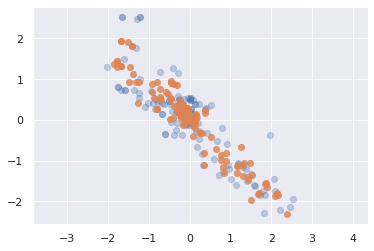

In [33]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

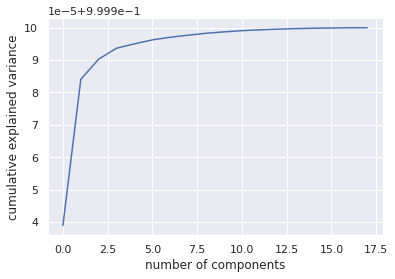

In [24]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Around 2.5 number of components that explain the variance in the X_training data

__________________________________________

## RandomForestClassifier

- X_train
- Second time X_train
- X_test
- Long on y_train
- Lat on y_train

Feature Importance: 
1. Variable: RB                   Importance: 0.19
2. Variable: NA2O                 Importance: 0.17
3. Variable: TH                   Importance: 0.15
4. Variable: K2O                  Importance: 0.07
  
- Consistantly, RB, NA2O, TH, and K2O are the top four most important features. Although for each training set, they might be at a different level of importance. They still remain the top 4 important variables 

- Randomforest on Latitude is more accurate than Longitude


In [25]:
# RandomForestClassifier - Inital with X_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[cluster_variables], y_train)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Inital with X_train
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.8666666666666667]
 
[[56  4]
 [12 48]]


Here, we see that we get an accurracy score of ~80- 91%

In [26]:
# Saving feature names for later use
feature_list = list(cluster_variables)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: RB                   Importance: 0.2
Variable: TH                   Importance: 0.18
Variable: NA2O                 Importance: 0.16
Variable: K2O                  Importance: 0.07
Variable: SR                   Importance: 0.07
Variable: P2O5                 Importance: 0.06
Variable: ZR                   Importance: 0.05
Variable: TIO2                 Importance: 0.04
Variable: MGO                  Importance: 0.04
Variable: MNO                  Importance: 0.03
Variable: CAO                  Importance: 0.03
Variable: BA                   Importance: 0.03
Variable: SIO2                 Importance: 0.01
Variable: FEOT                 Importance: 0.01
Variable: AL2O3                Importance: 0.0


In [27]:
# RandomForestClassifier - Second time with Training
# Trying to improve accuracy  with important features 

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[['RB','NA2O','TH','K2O']], y_train)
pred = rf.predict(X_train[['RB','NA2O','TH','K2O']])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Second time with Training
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.48333333333333334]
 
[[28 32]
 [30 30]]


Using the top 4 features, we get an accuracy of ~48% which suggests that the other variables are necessary to tell the whole picture however these four tell just under half the story

In [28]:
# RandomForestClassifier - with X_test

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_test[cluster_variables], y_test)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.9583333333333334]
 
[[59  1]
 [ 4 56]]


In [29]:
# RandomForestClassifier - Long on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#X_test_std = X_test_std.values.reshape(-1,1)

rf.fit(X_train['LONGITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LONGITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.8833333333333333]
 
[[51  9]
 [ 5 55]]


In [30]:
# RandomForestClassifier - Lat on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

rf.fit(X_train['LATITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LATITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print('Accurracy of each prediction:  ',scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

Accurracy of each prediction:   [1.0]
 
[[60  0]
 [ 0 60]]


- Randomforest on Latitude is more accurate than Longitude

________________

##RandomForestRegression

- Geochemistry
- Latitude
- Longitude


Feature Importance for RandomForestRegression: 
1. Variable: ZR                   Importance: 0.27
2. Variable: TH                   Importance: 0.24
3. Variable: SR                   Importance: 0.13
4. Variable: RB                   Importance: 0.7

For geochemistry, Longitude, and Latitude these four elements are the most important. Some elements are different from the RandomForestClassifier. The elements that overlap include TH and RB. 


Mean Absolute Error: 0.16317500000000001
Mean Squared Error: 0.07046375833333333
Root Mean Squared Error: 0.2654501051673051
 
Accuracy: 0.7181449666666666


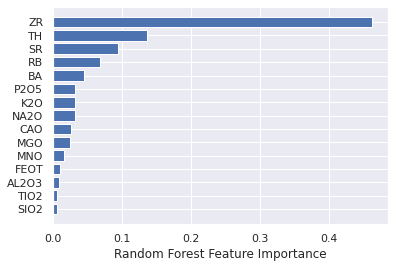

In [31]:
# RandomForestRegression - on geochemistry

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Bar plot important features
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], y_test))


Mean Absolute Error: 27.055871854166647
Mean Squared Error: 748.5797408659109
Root Mean Squared Error: 27.360185322214303
 
Accuracy: -0.26502431026482265


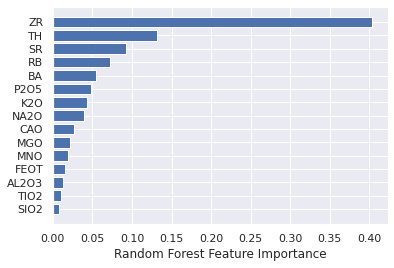

In [62]:
# RandomForestRegression - on Latitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LATITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LATITUDE']))

Mean Absolute Error: 69.37467539460407
Mean Squared Error: 4815.941711183428
Root Mean Squared Error: 69.39698632637752
 
Accuracy: -0.8615339159875951


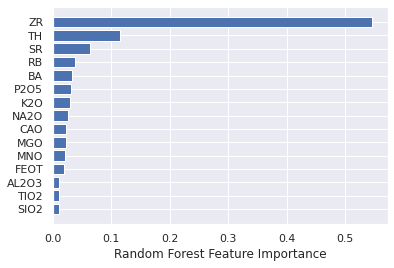

In [64]:
# RandomForestRegression - on Longitude

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train['LONGITUDE']) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_train['LONGITUDE']))

____________________________


## LogisticRegression

- X_train
- Latitude
- Longitude

The most important features keep changing for each sample of training data. The only element that reappears is TiO2. However, this element does not match the top five elements for RandomForestRegression or RandomForestClassifier. The accuracy is decent (~75). 


Mean Absolute Error: 0.24166666666666667
Mean Squared Error: 0.24166666666666667
Root Mean Squared Error: 0.4915960401250875
 
 
Accuracy: 0.7583333333333333
Precision: 0.7540983606557377
Recall: 0.7666666666666667
 
[[45 15]
 [14 46]]


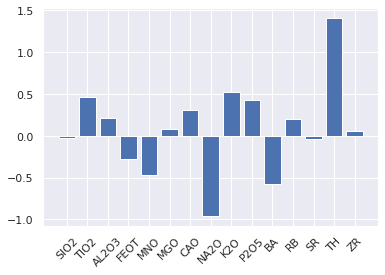

In [58]:
# Instantiate  LogisticRegression - X_train
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train[cluster_variables],y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Feature Importance for LogisticRegression: 
1. Variable: TH                  Importance: 1.4
2. Variable: CAO                 Importance: 1.3
3. Variable: TIO2                Importance: 0.9
4. Variable: SR                  Importance: 0.85

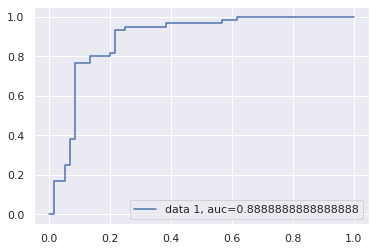

In [44]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - X_train
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.88. ( Pretty good )

Here we see a Reciever operating curve which shows true positives rate against false positive rate. We see that we get a AUC score of 0.91 which is pretty good suggesting that we have a decent classifier. 

Mean Absolute Error: 0.26666666666666666
Mean Squared Error: 0.26666666666666666
Root Mean Squared Error: 0.5163977794943222
 
 
Accuracy: 0.7333333333333333
Precision: 0.6521739130434783
Recall: 1.0
 
[[28 32]
 [ 0 60]]


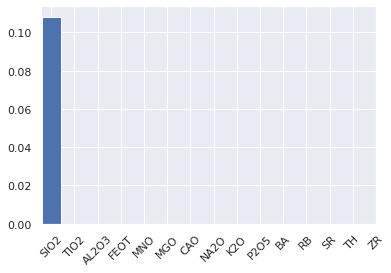

In [58]:
# Instantiate  LogisticRegression - Lat
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LATITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LATITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

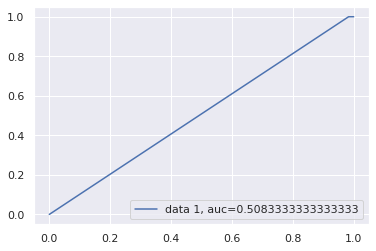

In [60]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Lat
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LATITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.88. ( Pretty good )

Mean Absolute Error: 0.1
Mean Squared Error: 0.1
Root Mean Squared Error: 0.31622776601683794
 
 
Accuracy: 0.9
Precision: 0.8333333333333334
Recall: 1.0
 
[[48 12]
 [ 0 60]]


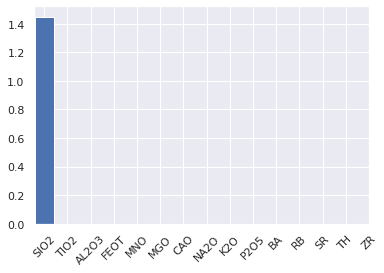

In [59]:
# Instantiate  LogisticRegression - Longitude
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LONGITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LONGITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

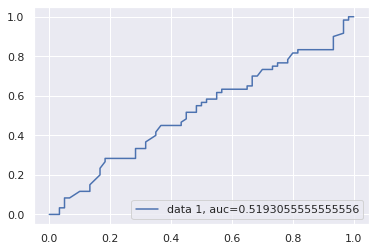

In [61]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Long
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_train['LONGITUDE'].values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.88. ( Pretty good )

_______

## Junk: Cool Plots?

In [ ]:
# Plotting the tree

# Limit depth of tree to 3 levels

#rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
#rf_small.fit(X_train[cluster_variables], y_train)

# Extract the small tree

#tree_small = rf_small.estimators_[5]

# Save the tree as a png image

#export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
#(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
#graph.write_png('small_tree.png');#

In [ ]:
# Limit depth of tree to 3 levels

#rf = RandomForestRegressor(n_estimators=10, max_depth = 3)
#rf.fit(X_train[cluster_variables], y_train)
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
#plt.rcParams.update({'font.size': 14})

# Tree plot

#_ = tree.plot_tree(rf.estimators_[0], feature_names=cluster_variables, filled=True)


In [ ]:
#viz = dtreeviz(rf.estimators_[0], X_train[cluster_variables], y_train, feature_names=feature_list, target_name='target')
#viz

In [59]:
# Confusion Matrix ( nice looking plot )


#class_names=[0,1] # name  of classes
#fig, ax = plt.subplots()
#tick_marks = np.arange(len(class_names))
#plt.xticks(tick_marks, class_names)
#plt.yticks(tick_marks, class_names)

# create heatmap

#sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
#plt.title('Confusion matrix', y=1.1)
#plt.ylabel('Actual label')
#plt.xlabel('Predicted label')

# Other Cluster

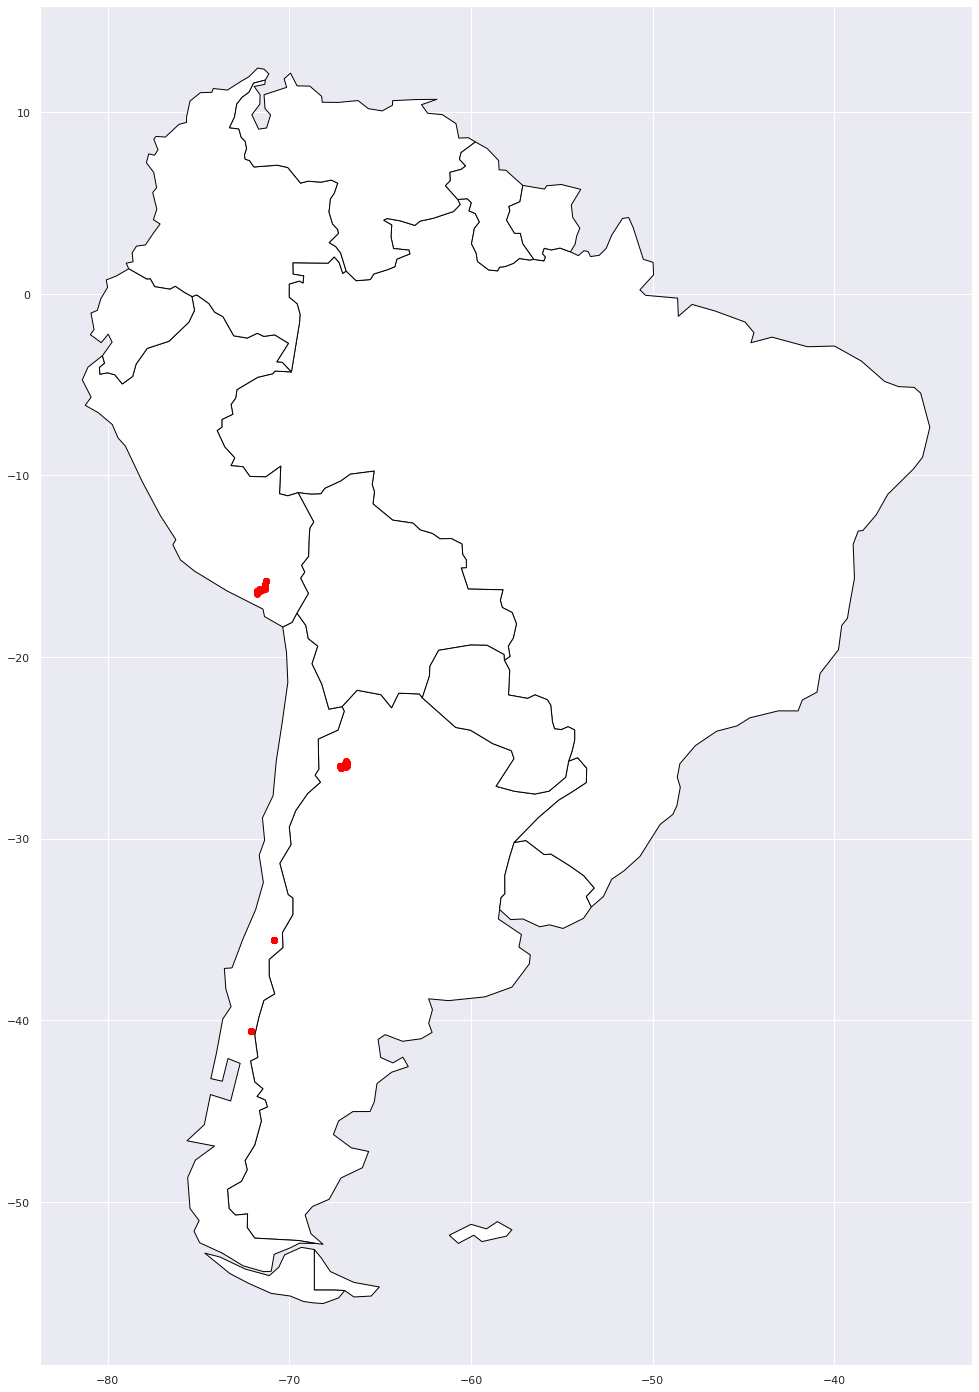

In [39]:

# Plotting 4 separated samples

target = {#'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          #'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          #'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          #'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          #'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          #'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10
          }

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns

data_four = df

data_four['target']= data_four['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_four['target'] = data_four['target'].fillna(0)
# Make target column int
data_four['target'] = data_four['target'].astype(float).astype(int)

# Drop targets that are not the 4 references
data_four = data_four[data_four['target'] >=1]
data_four


gdf = geopandas.GeoDataFrame(data_four, geometry=geopandas.points_from_xy(data_four['LONGITUDE'],data_four['LATITUDE']))
#print(gdf.head)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black',figsize = (40,25))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')


plt.show()

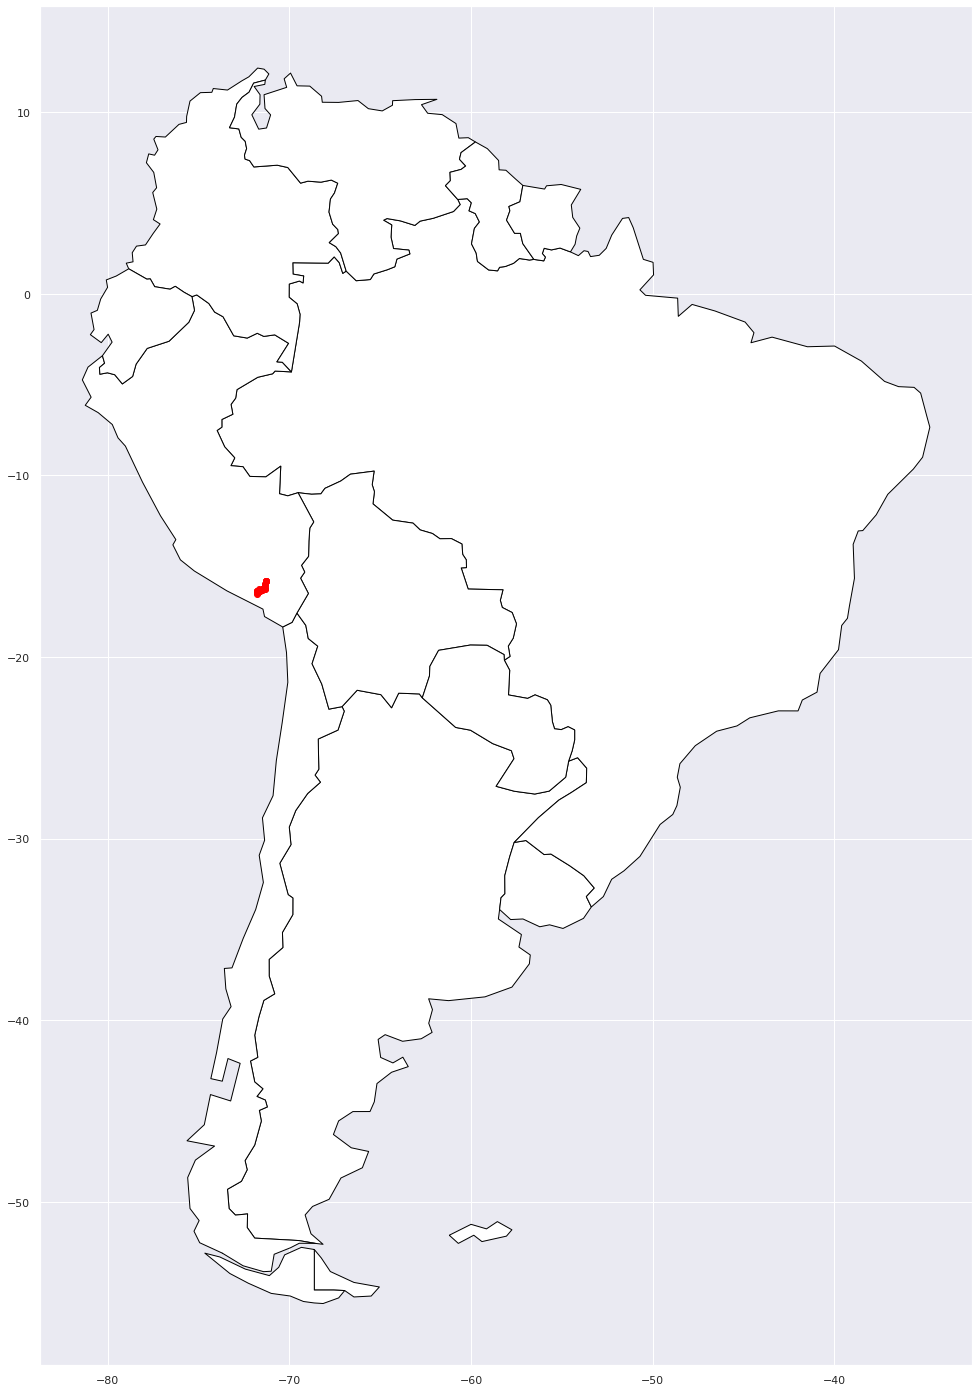

In [68]:
target = {#'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          #'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          #'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          #'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          #'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          #'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          #'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          #'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          #'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10,
          #'SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NARANJO, J. A.; LARA, L. E.; MORENO-ROA, HUGO, 2008':11,
          #'HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; FREY, F. A.; MORENO-ROA, HUGO, 2016':12,
          #'GODOY, B.; WÖRNER, G.; KOJIMA, S.; AGUILERA, F.; SIMON, K.; HARTMANN, G., 2014':13,
          #'HASCHKE, M.; SIEBEL, W.; GÜNTHER, A.; SCHEUBER, E., 2002':14,
          #'JICHA, B. R.; SINGER, B. S.; BEARD, B. L.; JOHNSON, CLARK M.; MORENO-ROA, HUGO; NARANJO, J. A., 2007':15,
          #'ULRICH, T.; HEINRICH, C. A., 2001':16,
          #'KLEIMAN, L. E.; JAPAS, M. S., 2009':17,
          #'BENEDINI, L.; GREGORI, D. A., 2013':18,
          #'RICHARDS, J. P.; BOYCE, A. J.; PRINGLE, M. S., 2001':19,
          #'HIGGINS, M. D.; VOOS, S.; VANDER AUWERA, J., 2015':20
          }

data_twenty = df
data_twenty['target']= data_twenty['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_twenty['target'] = data_twenty['target'].fillna(0)
# Make target column int
data_twenty['target'] = data_twenty['target'].astype(float).astype(int)

# Drop targets that are not the 4 references
data_twenty = data_twenty[data_twenty['target'] >=1]

gdf = geopandas.GeoDataFrame(data_twenty, geometry=geopandas.points_from_xy(data_twenty['LONGITUDE'],data_twenty['LATITUDE']))
#print(gdf.head)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black',figsize = (40,25))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')


plt.show()